# 📊 Technical Data Fellow Case Study: Nairobi Healthcare Access
##### This notebook analyzes disparities in healthcare access across Nairobi using health facility and census data. The goal is to identify underserved subcounties and propose data-driven investment recommendations.

In [1]:
# Load Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For mapping
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster

### Step 1: Load and Preview Data

In [2]:
# Show all columns
pd.set_option('display.max_columns', None)

# Load Datasets 
health_facilities = pd.read_excel("Kenya Healthcare Dataset.xls")
population_by_subcounty = pd.read_csv("population_by_subcounty.csv")
land_area_density = pd.read_csv("population_land_area_density_by_subcounty.csv")
household_size = pd.read_csv("household_size_by_subcounty.csv")
age_sex_population = pd.read_csv("population_age_sex_by_subcounty.csv")


WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [3]:
# Preview
health_facilities.head()

,Facility Code,Facility Name,Province,County,District,Division,Type,Owner,Location,Sub Location,Description of Location,Constituency,Nearest Town,Beds,Cots,Official Landline,Official Fax,Official Mobile,Official Email,Official Address,Official Alternate No,Town,Post Code,In Charge,Job Title of in Charge,Open 24 Hours,Open Weekends,Operational Status,ANC,ART,BEOC,BLOOD,CAES SEC,CEOC,C-IMCI,EPI,FP,GROWM,HBC,HCT,IPD,OPD,OUTREACH,PMTCT,RAD/XRAY,RHTC/RHDC,TB DIAG,TB LABS,TB TREAT,YOUTH
0,19224,CDF Kiriari Dispensary,Eastern,Embu,Manyatta,Manyatta,Dispensary,Ministry of Health,Ruguru,Ruguru,NaN,MANYATTA,Kiriari -market,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,148,NaN,Catherine Njoki Mugo,Nursing Officer in Charge,NaN,NaN,Operational,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19310,St Jude's Huruma Community Health Services,Nairobi,Nairobi,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,Situated near Ndururumo Primary School (Juja R...,MATHARE,Kariobangi Market,0.0,0.0,020237354,NaN,NaN,stjudes2008@yahoo.com,NaN,NaN,NaN,NaN,Caroline Achieng,Clinical Officer,N,Y,Operational,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14180,10 Engineer VCT,Rift Valley,Laikipia,Laikipia East,Central,Dispensary,Armed Forces,Nanyuki,Majengo,NaN,LAIKIPIA EAST,Nanyuki,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cpt Kiplagat,Medical Superintendant,N,N,Operational,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17486,12 Engineers,Central,Kiambu,Thika West,NaN,Dispensary,Ministry of Health,NaN,NaN,NaN,JUJA,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,Operational,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18393,3Kl Maternity & Nursing Home,Rift Valley,Kajiado,Kajiado North,Ongata Rongai,Nursing Home,Private Practice - Clinical Officer,Gataka,Gataka,Gataka Road,KAJIADO NORTH,Ongata Ronga,7.0,0.0,NaN,NaN,0733231565,kanyokanyokltd@gmail.com,P.O Box 15356,NaN,Langata,00509,Jeffrey Mikombi Akide,Clinical Officer,Y,Y,Operational,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
health_facilities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10505 entries, 0 to 10504
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Facility Code            10505 non-null  int64  
 1   Facility Name            10505 non-null  object 
 2   Province                 10505 non-null  object 
 3   County                   10505 non-null  object 
 4   District                 10505 non-null  object 
 5   Division                 10238 non-null  object 
 6   Type                     10505 non-null  object 
 7   Owner                    10505 non-null  object 
 8   Location                 10010 non-null  object 
 9   Sub Location             9613 non-null   object 
 10  Description of Location  5304 non-null   object 
 11  Constituency             10505 non-null  object 
 12  Nearest Town             9903 non-null   object 
 13  Beds                     10418 non-null  float64
 14  Cots                  

In [5]:
population_by_subcounty.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Distribution of Population by Sex and Sub-County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Source: 2019 Kenya Population and Housing Cens...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.knbs.or.ke/?wpdmpro=2019-kenya-pop...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Population, Male, Female, Intersex, Sub-county...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
population_by_subcounty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   398 non-null    object 
 1   Unnamed: 1   394 non-null    object 
 2   Unnamed: 2   394 non-null    object 
 3   Unnamed: 3   349 non-null    object 
 4   Unnamed: 4   394 non-null    object 
 5   Unnamed: 5   0 non-null      float64
 6   Unnamed: 6   0 non-null      float64
 7   Unnamed: 7   0 non-null      float64
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  0 non-null      float64
 12  Unnamed: 12  0 non-null      float64
 13  Unnamed: 13  0 non-null      float64
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

In [7]:
land_area_density.head ()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Distribution of Population by Land Area and Po...,NaN,NaN,NaN
1,Source: 2019 Kenya Population and Housing Cens...,NaN,NaN,NaN
2,https://wwwknbsorke/?wpdmpro=2019-kenya-popula...,NaN,NaN,NaN
3,"Population, Land area, Population density, Sub...",NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [8]:
land_area_density.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  401 non-null    object
 1   Unnamed: 1  397 non-null    object
 2   Unnamed: 2  397 non-null    object
 3   Unnamed: 3  397 non-null    object
dtypes: object(4)
memory usage: 12.7+ KB


In [9]:
household_size.head()

,Unnamed: 0,Unnamed: 1
0,Average Household Size by Sub-County,NaN
1,Source: 2019 Kenya Population and Housing Cens...,NaN
2,https://wwwknbsorke/?wpdmpro=2019-kenya-popula...,NaN
3,"Household size, Sub-county, County, Kenya",NaN
4,NaN,NaN


In [10]:
household_size.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  398 non-null    object
 1   Unnamed: 1  394 non-null    object
dtypes: object(2)
memory usage: 6.4+ KB


In [11]:
age_sex_population.head()

,county,sub-county,Age,Male,Female,Total
0,BARINGO,ALL,Total,336322,330428,666750
1,BARINGO,ALL,0,8303,7982,16285
2,BARINGO,ALL,1,8669,8417,17086
3,BARINGO,ALL,2,10226,9762,19988
4,BARINGO,ALL,3,10265,10086,20351


In [12]:
age_sex_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48208 entries, 0 to 48207
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   county      48208 non-null  object
 1   sub-county  48208 non-null  object
 2   Age         48208 non-null  object
 3   Male        48208 non-null  object
 4   Female      48208 non-null  object
 5   Total       48208 non-null  object
dtypes: object(6)
memory usage: 2.2+ MB


### Step 2: Clean and Standardize Datasets

In [13]:
# Drop duplicates
health_facilities.drop_duplicates(inplace=True)

# Standardize column names
health_facilities.columns = (
    health_facilities.columns
    .str.strip()
    .str.replace(" ", "_")
    .str.replace("/", "_")
    .str.replace("-", "_")
    .str.upper()
)

# Standardize COUNTY and filter for Nairobi only
health_facilities['COUNTY'] = health_facilities['COUNTY'].str.strip().str.title()
health_facilities = health_facilities[health_facilities['COUNTY'] == "Nairobi"]

# Clean CONSTITUENCY/Subcounty name
health_facilities['CONSTITUENCY'] = (
    health_facilities['CONSTITUENCY']
    .astype(str)
    .str.strip()
    .str.replace(r"[^a-zA-Z\s’'-]", "", regex=True)
    .str.title()
)

# Fill service columns: Y/N/NaN → 1/0
service_cols = [
    'ANC', 'ART', 'BEOC', 'BLOOD', 'CAES_SEC', 'CEOC', 'C_IMCI', 'EPI', 'FP',
    'GROWM', 'HBC', 'HCT', 'IPD', 'OPD', 'OUTREACH', 'PMTCT', 'RAD_XRAY',
    'RHTC_RHDC', 'TB_DIAG', 'TB_LABS', 'TB_TREAT', 'YOUTH'
]

for col in service_cols:
    if col in health_facilities.columns:
        health_facilities[col] = (
            health_facilities[col]
            .replace({'Y': 1, 'y': 1, 'N': 0, 'n': 0, '': 0, 'nan': 0, 'NAN': 0, np.nan: 0})
            .fillna(0)
        )
        health_facilities[col] = pd.to_numeric(health_facilities[col], errors='coerce').fillna(0).astype(int)

# Fill contact-related columns with "Unknown"
contact_cols = ['OFFICIAL_EMAIL', 'OFFICIAL_MOBILE', 'IN_CHARGE']
for col in contact_cols:
    if col in health_facilities.columns:
        health_facilities[col] = health_facilities[col].fillna("Unknown")

# Fill infrastructure numbers with 0 if missing
for infra_col in ['BEDS', 'COTS']:
    if infra_col in health_facilities.columns:
        health_facilities[infra_col] = health_facilities[infra_col].fillna(0)
        health_facilities[infra_col] = pd.to_numeric(health_facilities[infra_col], errors='coerce').fillna(0).astype(int)

# Final preview
health_facilities.head()


,FACILITY_CODE,FACILITY_NAME,PROVINCE,COUNTY,DISTRICT,DIVISION,TYPE,OWNER,LOCATION,SUB_LOCATION,DESCRIPTION_OF_LOCATION,CONSTITUENCY,NEAREST_TOWN,BEDS,COTS,OFFICIAL_LANDLINE,OFFICIAL_FAX,OFFICIAL_MOBILE,OFFICIAL_EMAIL,OFFICIAL_ADDRESS,OFFICIAL_ALTERNATE_NO,TOWN,POST_CODE,IN_CHARGE,JOB_TITLE_OF_IN_CHARGE,OPEN_24_HOURS,OPEN_WEEKENDS,OPERATIONAL_STATUS,ANC,ART,BEOC,BLOOD,CAES_SEC,CEOC,C_IMCI,EPI,FP,GROWM,HBC,HCT,IPD,OPD,OUTREACH,PMTCT,RAD_XRAY,RHTC_RHDC,TB_DIAG,TB_LABS,TB_TREAT,YOUTH
1,19310,St Jude's Huruma Community Health Services,Nairobi,Nairobi,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,Situated near Ndururumo Primary School (Juja R...,Mathare,Kariobangi Market,0,0,020237354,NaN,Unknown,stjudes2008@yahoo.com,NaN,NaN,NaN,NaN,Caroline Achieng,Clinical Officer,N,Y,Operational,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,13043,7Kr Mrs Health Centre,Nairobi,Nairobi,Langata,Lang'ata,Health Centre,Armed Forces,Mugumoini,Mugumoini,"Next to Nairobi Opharnage,Off Lang'ata rd.",Lang'Ata,Lang'ata Shopping Center,14,0,NaN,NaN,Unknown,Unknown,P.O Box 44008,NaN,Nairobi,00100,Captain Murunga,Nursing Officer in Charge,Y,Y,Operational,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0
10,20346,AAR Adams Health Centre,Nairobi,Nairobi,Kibra,Woodly,Medical Clinic,Private Practice - General Practitioner,Woodly,Woodly,Greenhouse Adams 1st Floor,Kibra,Adams,0,0,0202608570,NaN,0731191077,Unknown,P.O Box 41766,706659786.0,Nairobi,00100,Dr Mbuthia Wacera,Medical Superintendant,N,Y,Operational,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,12861,AAR City Centre Clinic,Nairobi,Nairobi,Starehe,Starehe,Medical Clinic,Private Enterprise (Institution),Central Business District,NaN,Stiuated at ICEA Building along Kenyatta Avenu...,Starehe,Nairobi,0,0,02031893124,NaN,Unknown,emutugi@aar.co.ke,P.O Box 41766,NaN,Nairobi,00100,Dr. Alma Okudo,Doctor In Charge,N,Y,Operational,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
12,16796,AAR Clinic Sarit Centre (Westlands),Nairobi,Nairobi,Westlands,Parklands,Medical Clinic,Private Enterprise (Institution),Parklands,Upper Parklands,In Sarit Centre westlands,Westlands,Nairobi,0,0,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,Unknown,Nursing Officer in Charge,N,N,Operational,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Population by Subcounty

In [14]:
# Load the CSV, skipping metadata rows up to the actual header
population_by_subcounty = pd.read_csv("population_by_subcounty.csv", skiprows=6)

# Keep only the first 5 useful columns (sometimes extra columns are NaNs)
population_by_subcounty = population_by_subcounty.iloc[:, :5]

# Rename columns
population_by_subcounty.columns = ['SubCounty', 'Male', 'Female', 'Intersex', 'Total']

# Drop rows where SubCounty is missing or blank
population_by_subcounty = population_by_subcounty.dropna(subset=['SubCounty'])
population_by_subcounty = population_by_subcounty[population_by_subcounty['SubCounty'].str.strip() != '']

# Strip and format SubCounty names
population_by_subcounty['SubCounty'] = (
    population_by_subcounty['SubCounty']
    .astype(str)
    .str.strip()
    .str.replace(r"[^a-zA-Z\s’'-]", "", regex=True)  # Remove non-alphabetic junk
    .str.title()
)

# Clean numeric columns robustly
for col in ['Male', 'Female', 'Intersex', 'Total']:
    population_by_subcounty[col] = (
        population_by_subcounty[col]
        .astype(str)
        .str.replace(",", "")         # Remove commas
        .str.strip()                  # Remove extra spaces
        .replace({'': '0', 'nan': '0'})  # Handle blank or 'nan' strings
        .astype(float)                # Convert to float first
        .fillna(0)                    # Ensure no NaN remains
        .astype(int)                  # Then convert to int
    )

# Final preview
population_by_subcounty.head()


,SubCounty,Male,Female,Intersex,Total
0,Kenya,23548056,24014716,1524,47564296
1,Mombasa,610257,598046,30,1208333
2,Changamwe,68761,63121,0,131882
3,Jomvu,83002,80410,3,163415
4,Kisauni,146748,145176,6,291930


## Land Area & Population Density by Subcounty

In [15]:
# Rename
land_area_density.columns = ['SubCounty', 'Population', 'LandArea_km2', 'PopDensity']

# Clean SubCounty names
land_area_density['SubCounty'] = land_area_density['SubCounty'].str.strip().str.title()
print(population_by_subcounty.columns)

population_by_subcounty['SubCounty'] = population_by_subcounty['SubCounty'].str.strip().str.title()

# Filter only Nairobi subcounties based on population data
land_area_density = land_area_density[
    land_area_density['SubCounty'].isin(population_by_subcounty['SubCounty'])
]

# Convert numeric columns to float
for col in ['Population', 'LandArea_km2', 'PopDensity']:
    land_area_density[col] = (
        land_area_density[col]
        .astype(str)
        .str.replace(",", "")
        .str.strip()
        .replace("", "0")
        .astype(float)
    )

# Preview cleaned data
land_area_density.head()


Index(['SubCounty', 'Male', 'Female', 'Intersex', 'Total'], dtype='object')


,SubCounty,Population,LandArea_km2,PopDensity
6,Kenya,47564296.0,580876.3,82.0
7,Mombasa,1208333.0,219.9,5495.0
8,Changamwe,131882.0,17.7,7457.0
9,Jomvu,163415.0,36.9,4432.0
10,Kisauni,291930.0,87.7,3328.0


## Household Size by Subcounty

In [16]:
# Load skipping metadata rows
household_size = pd.read_csv("household_size_by_subcounty.csv", skiprows=6, header=None)

# Set column names manually
household_size.columns = ['SubCounty', 'HouseholdSize']

# Drop the first row (contains duplicate headers)
household_size = household_size[1:]

# Drop rows with missing subcounty names
household_size = household_size.dropna(subset=['SubCounty'])

# Clean SubCounty names
household_size['SubCounty'] = household_size['SubCounty'].str.strip().str.title()

# Clean HouseholdSize values
household_size['HouseholdSize'] = (
    household_size['HouseholdSize']
    .astype(str)
    .str.replace(",", "")
    .str.strip()
    .replace("", "0")
    .astype(float)
)

# Make sure population_by_subcounty subcounties are clean and titled
population_by_subcounty['SubCounty'] = population_by_subcounty['SubCounty'].str.strip().str.title()

# Filter household_size to only Nairobi subcounties
household_size = household_size[
    household_size['SubCounty'].isin(population_by_subcounty['SubCounty'])
]

# Final preview
household_size.head()


,SubCounty,HouseholdSize
4,Ainabkoi,3.9
5,Athi River,2.9
6,Awendo,4.3
7,Balambala,7.3
8,Banisa,6.3


## Age & Sex Distribution by Subcounty

In [18]:
# Standardize all column names
age_sex_population.columns = age_sex_population.columns.str.strip().str.lower().str.replace(" ", "_")

# Step 3: Rename for uniformity
age_sex_population.rename(columns={
    'county': 'County',
    'sub-county': 'Subcounty',
    'age': 'Age',
    'male': 'Male',
    'female': 'Female',
    'total': 'Total'
}, inplace=True)

# Clean Subcounty and County names
print(age_sex_population.columns.tolist())

age_sex_population['Subcounty'] = age_sex_population['Subcounty'].astype(str).str.strip().str.title()
age_sex_population['County'] = age_sex_population['County'].astype(str).str.strip().str.title()

# Step 5: Clean numeric columns
def clean_numeric(col):
    return (
        col.astype(str)
        .str.extract(r'(\d+\.?\d*)')[0]  
        .fillna("0")                    
        .astype(float)
        .astype(int)
    )

for col in ['Male', 'Female', 'Total']:
    age_sex_population[col] = clean_numeric(age_sex_population[col])



# Create MinAge for plotting
def extract_min_age(age_val):
    try:
        return int(str(age_val).split('-')[0].strip())
    except:
        return np.nan

age_sex_population['MinAge'] = age_sex_population['Age'].apply(extract_min_age)

# Preview
age_sex_population.head()


['County', 'Subcounty', 'Age', 'Male', 'Female', 'Total']


,County,Subcounty,Age,Male,Female,Total,MinAge
0,Baringo,All,Total,336322,330428,666750,NaN
1,Baringo,All,0,8303,7982,16285,0.0
2,Baringo,All,1,8669,8417,17086,1.0
3,Baringo,All,2,10226,9762,19988,2.0
4,Baringo,All,3,10265,10086,20351,3.0


In [20]:
# Fill Kibra missing values manually
# Create a new Kibra row
new_kibra_row = pd.DataFrame({
    'SUBCOUNTY': ['Kibra'],
    'LandArea_km2': [12.1],
    'PopDensity': [15360],
})

# You can add Population too if your DataFrame still has it
new_kibra_row['Population'] = [185777]

# Append to land_area_density
land_area_density = pd.concat([land_area_density, new_kibra_row], ignore_index=True)


###  Step 3: Merge Datasets and Create Metrics

In [24]:
#  Clean SubCounty names using actual column name
print(population_by_subcounty.columns.tolist())

population_by_subcounty['SubCounty'] = population_by_subcounty['SubCounty'].astype(str).str.strip().str.title()
land_area_density['SubCounty'] = land_area_density['SubCounty'].astype(str).str.strip().str.title()
household_size['SubCounty'] = household_size['SubCounty'].astype(str).str.strip().str.title()

# Remove the national total row
population_by_subcounty = population_by_subcounty[population_by_subcounty['SubCounty'].str.lower() != 'kenya']

# Merge datasets using consistent column name
merged = population_by_subcounty.merge(land_area_density, on='SubCounty', how='left')
merged = merged.merge(household_size, on='SubCounty', how='left')

#  Filter only Nairobi subcounties
nairobi_subcounties = [
    'Dagoretti North', 'Dagoretti South', 'Embakasi Central', 'Embakasi East',
    'Embakasi North', 'Embakasi South', 'Embakasi West', 'Kamukunji',
    'Kasarani', 'Kibra', 'Langata', 'Makadara', 'Mathare',
    'Roysambu', 'Ruaraka', 'Starehe', 'Westlands'
]
merged = merged[merged['SubCounty'].isin(nairobi_subcounties)]

#  Reset index and preview
merged.reset_index(drop=True, inplace=True)
merged.head()



['SubCounty', 'Male', 'Female', 'Intersex', 'Total']


,SubCounty,Male,Female,Intersex,Total,Population,LandArea_km2,PopDensity,SUBCOUNTY,HouseholdSize
0,Kamukunji,136670,131599,7,268276,268276.0,10.5,25455.0,NaN,3.1
1,Kasarani,381234,399385,37,780656,780656.0,86.2,9058.0,NaN,2.8
2,Kibra,94199,91569,9,185777,NaN,NaN,NaN,NaN,2.9
3,Makadara,96369,93157,10,189536,189536.0,11.7,16150.0,NaN,2.7
4,Mathare,106522,100028,14,206564,206564.0,3.0,68941.0,NaN,2.7


In [25]:
missing_density = merged[merged['Population'].isna()]
print("Subcounties missing density info:", missing_density['SUBCOUNTY'].tolist())


Subcounties missing density info: [nan]


In [26]:
(merged['Total'] == merged['Population']).value_counts()


True     6
False    1
Name: count, dtype: int64

In [27]:
mismatches = merged[merged['Total'] != merged['Population']]
print(mismatches[['SUBCOUNTY', 'Total', 'Population']])


  SUBCOUNTY   Total  Population
2       NaN  185777         NaN


In [28]:
# Reset index for clean display
merged.reset_index(drop=True, inplace=True)

# View the final table
merged.head(10)


,SubCounty,Male,Female,Intersex,Total,Population,LandArea_km2,PopDensity,SUBCOUNTY,HouseholdSize
0,Kamukunji,136670,131599,7,268276,268276.0,10.5,25455.0,NaN,3.1
1,Kasarani,381234,399385,37,780656,780656.0,86.2,9058.0,NaN,2.8
2,Kibra,94199,91569,9,185777,NaN,NaN,NaN,NaN,2.9
3,Makadara,96369,93157,10,189536,189536.0,11.7,16150.0,NaN,2.7
4,Mathare,106522,100028,14,206564,206564.0,3.0,68941.0,NaN,2.7
5,Starehe,109173,101238,12,210423,210423.0,20.6,10205.0,NaN,2.8
6,Westlands,153818,155021,15,308854,308854.0,97.5,3167.0,NaN,2.9


In [29]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SubCounty      7 non-null      object 
 1   Male           7 non-null      int32  
 2   Female         7 non-null      int32  
 3   Intersex       7 non-null      int32  
 4   Total          7 non-null      int32  
 5   Population     6 non-null      float64
 6   LandArea_km2   6 non-null      float64
 7   PopDensity     6 non-null      float64
 8   SUBCOUNTY      0 non-null      object 
 9   HouseholdSize  7 non-null      float64
dtypes: float64(4), int32(4), object(2)
memory usage: 580.0+ bytes


In [30]:
# Count number of facilities per subcounty
facilities_by_subcounty = (
    health_facilities.groupby('CONSTITUENCY')
    .size()
    .reset_index(name='FacilityCount')
)

# Fix name alignment
facilities_by_subcounty['CONSTITUENCY'] = facilities_by_subcounty['CONSTITUENCY'].str.strip().str.title()
merged['SUBCOUNTY'] = merged['SUBCOUNTY'].str.strip().str.title()

# Merge
final_df = merged.merge(facilities_by_subcounty, left_on='SUBCOUNTY', right_on='CONSTITUENCY', how='left')

# Replace missing facility counts with 0
final_df['FacilityCount'] = final_df['FacilityCount'].fillna(0).astype(int)

# People per facility
final_df['PeoplePerFacility'] = (final_df['Total'] / final_df['FacilityCount']).replace([np.inf, np.nan], np.nan)

# Facilities per 10,000 people
final_df['FacilitiesPer10k'] = final_df['FacilityCount'] / final_df['Total'] * 10000

# Final preview
final_df[['SUBCOUNTY', 'Total', 'PopDensity', 'FacilityCount', 'PeoplePerFacility', 'FacilitiesPer10k']]


,SUBCOUNTY,Total,PopDensity,FacilityCount,PeoplePerFacility,FacilitiesPer10k
0,NaN,268276,25455.0,0,NaN,0.0
1,NaN,780656,9058.0,0,NaN,0.0
2,NaN,185777,NaN,0,NaN,0.0
3,NaN,189536,16150.0,0,NaN,0.0
4,NaN,206564,68941.0,0,NaN,0.0
5,NaN,210423,10205.0,0,NaN,0.0
6,NaN,308854,3167.0,0,NaN,0.0


###  Step 4: Visualize Key Metrics

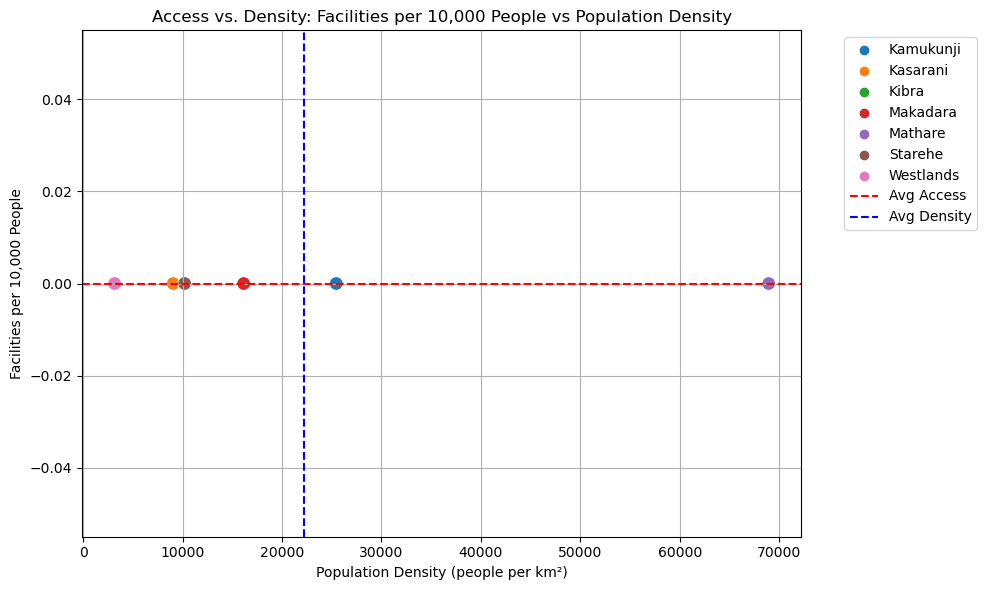

In [34]:
# VISUALIZATION 1: Scatter Plot — Population Density vs. Facilities per 10,000 People

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=final_df,
    x='PopDensity',
    y='FacilitiesPer10k',
    hue='SubCounty',  # 
    s=100
)

plt.title('Access vs. Density: Facilities per 10,000 People vs Population Density')
plt.xlabel('Population Density (people per km²)')
plt.ylabel('Facilities per 10,000 People')
plt.axhline(final_df['FacilitiesPer10k'].mean(), color='red', linestyle='--', label='Avg Access')
plt.axvline(final_df['PopDensity'].mean(), color='blue', linestyle='--', label='Avg Density')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Optional: move legend out of plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
# VISUALIZATION 2: Bar Chart — People Per Facility by Subcounty
plt.figure(figsize=(12, 6))
sns.barplot(data=final_df.sort_values('PeoplePerFacility', ascending=False),
            x='SUBCOUNTY', y='PeoplePerFacility', palette='magma')
plt.xticks(rotation=45)
plt.title('Subcounties by People per Health Facility (Lower = Better Access)')
plt.ylabel('People per Facility')
plt.xlabel('Subcounty')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


ValueError: min() arg is an empty sequence

<Figure size 1200x600 with 0 Axes>

In [33]:
#VISUALIZATION 3: Bar Chart — Facility Count per Subcounty
plt.figure(figsize=(12, 6))
sns.barplot(data=final_df.sort_values('FacilityCount', ascending=False),
            x='SUBCOUNTY', y='FacilityCount', palette='viridis')
plt.xticks(rotation=45)
plt.title('Number of Facilities per Subcounty')
plt.ylabel('Facility Count')
plt.xlabel('Subcounty')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


ValueError: min() arg is an empty sequence

<Figure size 1200x600 with 0 Axes>

In [ ]:
# VISUALIZATION 4: Heatmap — Correlation of Key Metrics
corr_data = final_df[['Total', 'PopDensity', 'HouseholdSize', 'FacilityCount', 'FacilitiesPer10k', 'PeoplePerFacility']]
plt.figure(figsize=(10, 6))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Healthcare Access & Demographic Metrics')
plt.tight_layout()
plt.show()


In [ ]:
 Technical Data Fellow Case Study: Nairobi Healthcare Access¶
This notebook analyzes disparities in healthcare access across Nairobi using health facility and census data. The goal is to identify underserved subcounties and propose data-driven investment recommendations.